<a href="https://colab.research.google.com/github/IlyaTsibulin/Matplotlib/blob/main/%D0%97%D0%B0%D1%87%D0%B5%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive

%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подготовка данных для визуализации

In [ ]:
# Это один из вариантов чтения нескольких листов из файлов Excel

# Сначала создаём общий объект работы с Excel-файлами
excel_reader = pd.ExcelFile('/content/drive/MyDrive/vpn-rf.xlsx')

# Читаем 1-й лист
df1 = excel_reader.parse('Обзор рынка',
                         index_col=None, # Нам не нужны индексы на данный момент
                         header=None)    # Нам не нужны заголовки на данный момент

# Читаем 2-й лист
df2 = excel_reader.parse('Опрос компаний', index_col=None, header=None)

In [ ]:
df1

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Рынок сетевых услуг для предприятий в 2015-202...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000
4,Рынок аренды каналов,18.000,17.600,17.500,17.700,18.100,18.400
5,Рынок VPN,35.000,36.700,38.200,40.600,42.000,47.700
6,Рынок услуг сетевой безопасности,4.100,4.500,4.900,5.500,6.200,6.900
7,Рынок услу SD-WAN,0.000,0.000,0.000,0.100,0.300,0.500
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2

,0,1,2
0,NaN,NaN,NaN
1,Частная линия какой пропускной способности наи...,NaN,NaN
2,NaN,NaN,NaN
3,<5 Мбит,3.0,0.046875
4,5-9 Мбит,5.0,0.078125
5,10-49 Мбит,12.0,0.187500
6,50-99 Мбит,12.0,0.187500
7,100-499 Мбит,24.0,0.375000
8,500 Мбит и более,8.0,0.125000
9,NaN,NaN,NaN


In [ ]:
# Функция берет составной датафрейм и делит его на отдельные датафреймы

def split_df(df):
  odf = [] # Тут будем хранить все датафреймы
  ndf = [] # Тут будем хранить все названия датафреймов

  isDF    = False # Обрабатываем ли мы текущий датафрейм
  isData  = False # Начали ли мы обрабатывать данные из датафрейма
  dfName  = ''    # Текущее название
  years   = []

  for index, row in df.iterrows():
    # Это заголовок?
    if not pd.isnull(row[0]) and pd.isnull(row[1]) and pd.isnull(row[2]) and not isDF:
      dfName = row[0]
      df = pd.DataFrame() # Создаем новый набор данных
      isDF = True
      #print("Нашли заголовок", dfName)


    # Это конец датафрейма?
    if pd.isnull(row[0]) and pd.isnull(row[1]):
      #print("Нашли конец", isData)
      if isData:
        #print("Это конец")
        # Если это конец датафрейма, то предыдущий сохраняем в нашем наборе
        if len(years) > 1:
          df.columns = years.tolist()

        odf.append(df)
        ndf.append(dfName)
        isDF    = False
        isData  = False
        dfName  = ''
        years   = []
      continue

    # Это строка с данными?
    if not pd.isnull(row[0]) and not pd.isnull(row[1]) and isDF:
      # Добавляем строчку в датафрейм
      # print("Нашли данные")
      df = pd.concat([df, pd.DataFrame([np.array(row)])], axis=0, ignore_index=True)
      isData = True
      continue

    # Это строка с годами?
    if isDF and not isData and pd.isnull(row[0]) and not pd.isnull(row[1]):
      row[0] = '0'
      years = row.astype('int32')
      continue


  # Если мы еще не записали последнюю порцию, то записываем
  if isDF and isData:
    if len(years) > 1:
      df.columns = years.tolist()
    odf.append(df)
    ndf.append(dfName)


  return (odf, ndf)

In [ ]:
odf1, ndf1 = split_df(df1)
print(len(odf1), len(ndf1))

odf2, ndf2 = split_df(df2)
print(len(odf2), len(ndf2))


3 3
3 3


In [ ]:
print(ndf2[0])

Частная линия какой пропускной способности наиболее
востребована в вашей организации? Одиночный выбор


In [ ]:
odf2[0]
odf2[1]
odf2[2]

,0,1,2
0,Нет такой потребности,46.0,0.676471
1,"Да, есть; не более 250 мс",8.0,0.117647
2,"Да, есть; не более 100 мс",6.0,0.088235
3,"Да, есть; не более 80 мс",4.0,0.058824
4,"Да, есть; не более 50 мс",4.0,0.058824


In [ ]:
print(ndf1[2])

Объем рынка VPN, млрд. рублей


In [ ]:
odf1[1]


,0,2015,2016,2017,2018,2019,2020
0,Ростелеком,0.563,0.568,0.575,0.577,0.578,0.623
1,Вымпелком,0.066,0.064,0.063,0.061,0.060,0.054
2,ТТК,0.048,0.047,0.045,0.045,0.042,0.037
3,Orange Business Service,0.034,0.037,0.038,0.038,0.038,0.034
4,МегаФон,0.127,0.121,0.117,0.112,0.109,0.098
5,АКАДО,0.083,0.087,0.087,0.083,0.081,0.070
6,Прочие,0.079,0.076,0.075,0.084,0.092,0.083


In [ ]:
odf1[2]

,0,2015,2016,2017,2018,2019,2020
0,Межрегиональный VPN,16.7,17.0,17.5,18.4,18.9,21.0
1,Внутри региональный VPN,18.4,19.6,20.7,22.3,23.1,26.7
2,Аренда межрегиональных каналов (NPL),11.3,11.3,11.0,10.6,10.3,10.2
3,Аренда международных каналов (IPL),6.7,6.3,6.5,7.1,7.8,8.2


# Создание визуализаций

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Определение палитр цветов
palette_pie = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ADD8E6','#9400D3','#F5DEB3']
palette_bar = ['#8e44ad', '#3498db', '#e74c3c', '#2ecc71', '#f1c40f']

# Визуализация круговой диаграммы с отображением реального количества
def make_pie(df):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot()

    ax.pie(
        x=np.array(df[1]),
        labels=np.array(df[0]),
        colors=palette_pie,  # Используем пользовательскую палитру
        startangle=90,
        autopct=lambda p: '{:.2f}%\n({:d})'.format(p, int(p/100.*np.sum(df[1]))),  # Отображаем и процент, и абсолютное значение
        pctdistance=0.80,
        wedgeprops={'width': 0.40, 'edgecolor': 'w', 'linewidth': 3},
        textprops={'fontsize': 8}
    )

    plt.tight_layout()  # Автоматическая настройка расположения подписей, чтобы они не налезали друг на друга
    plt.show()

    return plt

# Визуализация столбчатой диаграммы с заданной палитрой и отступом у последнего столбца
def make_bar(x, y):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Используем цикл для применения цветов из палитры к каждому столбцу
    for i in range(len(x)):
        ax.bar(x[i], y[i], color=palette_bar[i % len(palette_bar)])

    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

    return plt

def make_bar3(x, y, legend=''):
    x_labels = x

    x = np.arange(len(x_labels))  # Заголовки столбцов
    width = 0.25  # ширина столбцов
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

    max_val = 0  # Инициализация переменной для хранения максимального значения Y

    for idx, (attribute, val) in enumerate(y.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, val, width, label=attribute, color=palette_bar[idx % len(palette_bar)])  # Применение цвета
        ax.bar_label(rects, padding=3)
        multiplier += 1
        max_val = max(max_val, max(val))  # Обновление максимального значения Y

    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(x_labels, rotation=45)

    # Настройка отступа сверху путем установки верхнего предела для оси Y
    top_padding = max_val * 0.1  # Рассчитываем отступ как 10% от максимального значения Y
    ax.set_ylim(top=max_val + top_padding)  # Устанавливаем верхний предел для оси Y

    anchor = (0,1.08)
    loc = 'upper left'
    ncols = len(x_labels)
    if legend == 'right':
        anchor = (1.05, 1)
        ncols = 1
    elif legend == '2lines':
        anchor = (0,1.13)
        ncols = ncols // 2
    ax.legend(ncols=ncols, loc=loc, bbox_to_anchor=anchor, fontsize='small')

    plt.tight_layout()
    plt.show()

    return plt


def prepare_bar3(cdf, lines=[]):
    x = np.array(cdf.columns)[1:]
    y = []
    n = []
    for i in range(len(cdf.axes[0])):
        y.append(np.array(cdf.iloc[i:i+1])[0][1:])
        n.append(np.array(cdf.iloc[i:i+1])[0][0])
    if len(lines) < 1:
        lines = range(len(n))
    st = dict()
    for i in lines:
        st[n[i]] = y[i]
    return x, st

def make_plot(x, y):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot()
    ax.plot(x, y)
    plt.tight_layout()
    plt.show()
    return plt


In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf1[0].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf1[0].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_vpn = "<h2>"+ndf1[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('vpn_market.html', 'w')
fd.write(html_vpn)
fd.close()
display(HTML(html_vpn))

['Рынок аренды каналов' 18.0 17.6 17.5 17.7 18.1 18.4]
['Рынок VPN' 35.0 36.7 38.2 40.6 42.0 47.7]
['Рынок услуг сетевой безопасности' 4.1 4.5 4.9 5.5 6.2 6.9]
['Рынок услу SD-WAN' 0.0 0.0 0.0 0.1 0.3 0.5]


,2015,2016,2017,2018,2019,2020
Рынок аренды каналов,18.0,17.6,17.5,17.7,18.1,18.4
Рынок VPN,35.0,36.7,38.2,40.6,42.0,47.7
Рынок услуг сетевой безопасности,4.1,4.5,4.9,5.5,6.2,6.9
Рынок услу SD-WAN,0.0,0.0,0.0,0.1,0.3,0.5


<ipython-input-124-cfc108639fe8>:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


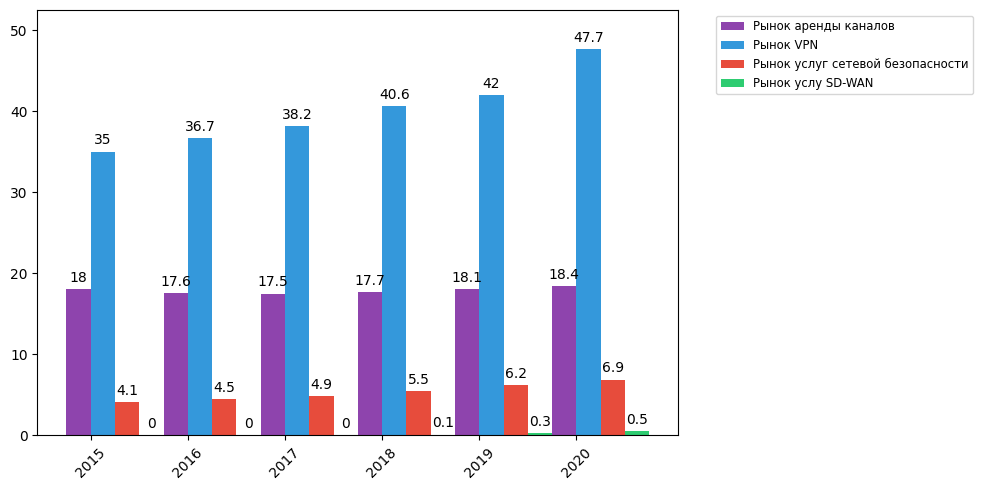

<Figure size 640x480 with 0 Axes>

In [ ]:
x, y = prepare_bar3(odf1[0])

bar0 = make_bar3(x, y, legend='right')
plt.savefig('/content/drive/MyDrive/static/bar_chart.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf1[1].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf1[1].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_com = "<h2>"+ndf1[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('vpn_vol.html', 'w')
fd.write(html_com)
fd.close()
display(HTML(html_com))

['Ростелеком' 0.563 0.568 0.575 0.577 0.578 0.623]
['Вымпелком' 0.066 0.064 0.063 0.061 0.06 0.054]
['ТТК' 0.048 0.047 0.045 0.045 0.042 0.037]
['Orange Business Service' 0.034 0.037 0.038 0.038 0.038 0.034]
['МегаФон' 0.127 0.121 0.117 0.112 0.109 0.098]
['АКАДО' 0.083 0.087 0.087 0.083 0.081 0.07]
['Прочие' 0.079 0.076 0.075 0.084 0.092 0.083]


,2015,2016,2017,2018,2019,2020
Ростелеком,0.563,0.568,0.575,0.577,0.578,0.623
Вымпелком,0.066,0.064,0.063,0.061,0.06,0.054
ТТК,0.048,0.047,0.045,0.045,0.042,0.037
Orange Business Service,0.034,0.037,0.038,0.038,0.038,0.034
МегаФон,0.127,0.121,0.117,0.112,0.109,0.098
АКАДО,0.083,0.087,0.087,0.083,0.081,0.07
Прочие,0.079,0.076,0.075,0.084,0.092,0.083


Доля операторов на рынке по полученным доходам , %


<ipython-input-124-cfc108639fe8>:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


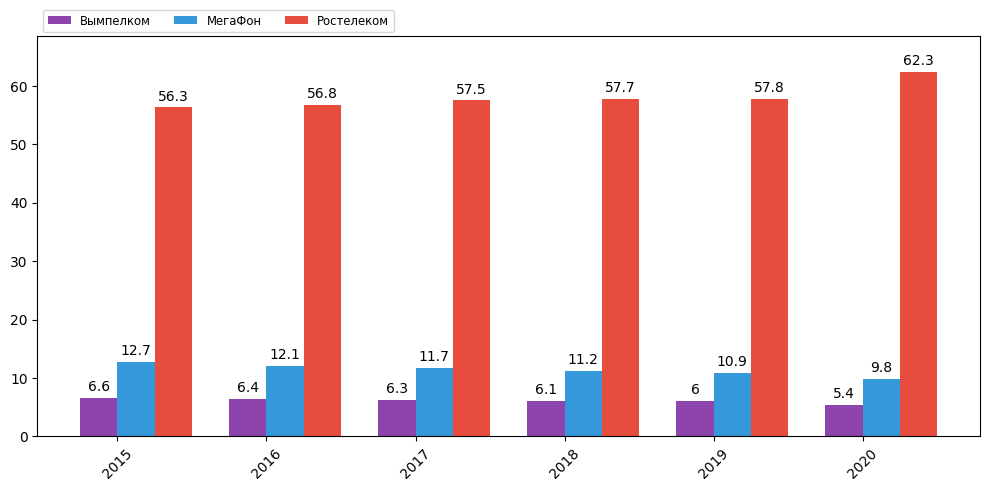

<Figure size 640x480 with 0 Axes>

In [ ]:
print(ndf1[1])

def mul(x, y):
  try:
    return pd.to_numeric(x) * y
  except:
    return x

odf11 = odf1[1]
odf11 = odf1[1].applymap(lambda x: mul(x, 100))

x, y = prepare_bar3(odf11, [1, 4, 0])
bar1 = make_bar3(x, y)
plt.savefig('/content/drive/MyDrive/static/operators.png', dpi=200, pad_inches=0)
plt.show()

In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf1[2].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf1[2].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_reg = "<h2>"+ndf1[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('vpn_vol_2.html', 'w')
fd.write(html_reg)
fd.close()
display(HTML(html_reg))

['Межрегиональный VPN' 16.7 17.0 17.5 18.4 18.9 21.0]
['Внутри региональный VPN' 18.4 19.6 20.7 22.3 23.1 26.7]
['Аренда межрегиональных каналов  (NPL)' 11.3 11.3 11.0 10.6 10.3 10.2]
['Аренда международных каналов (IPL)' 6.7 6.3 6.5 7.1 7.8 8.2]


,2015,2016,2017,2018,2019,2020
Межрегиональный VPN,16.7,17.0,17.5,18.4,18.9,21.0
Внутри региональный VPN,18.4,19.6,20.7,22.3,23.1,26.7
Аренда межрегиональных каналов (NPL),11.3,11.3,11.0,10.6,10.3,10.2
Аренда международных каналов (IPL),6.7,6.3,6.5,7.1,7.8,8.2


<ipython-input-124-cfc108639fe8>:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


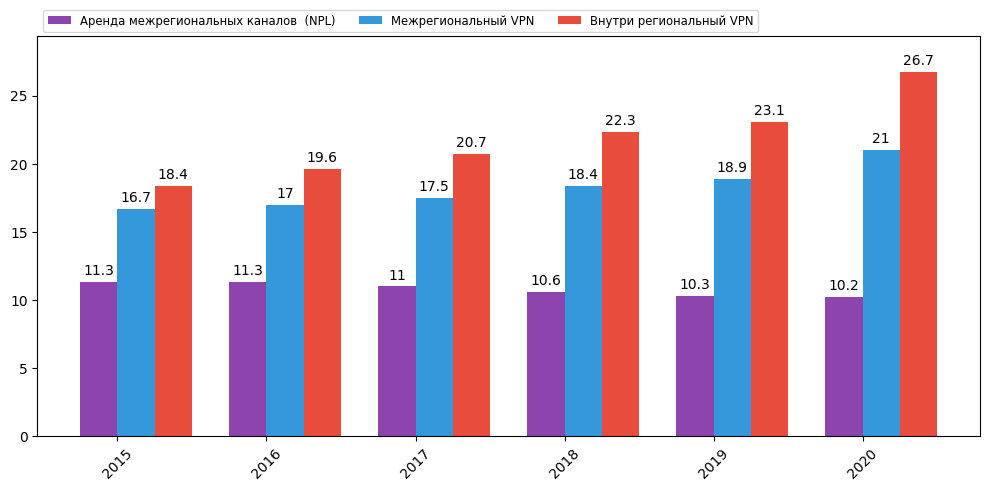

<Figure size 640x480 with 0 Axes>

In [ ]:
x, y = prepare_bar3(odf1[2], [2,0,1])
bar2 = make_bar3(x, y)
plt.savefig('/content/drive/MyDrive/static/market_size.png', dpi=200, pad_inches=0)
plt.show()

In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf2[0].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf2[0].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_internet = "<h2>"+ndf2[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('internet_nut.html', 'w')
fd.write(html_internet)
fd.close()
display(HTML(html_internet))

['<5 Мбит' 3.0 0.046875]
['5-9 Мбит' 5.0 0.078125]
['10-49 Мбит' 12.0 0.1875]
['50-99 Мбит' 12.0 0.1875]
['100-499 Мбит' 24.0 0.375]
['500 Мбит и более' 8.0 0.125]


,1,2
<5 Мбит,3.0,0.046875
5-9 Мбит,5.0,0.078125
10-49 Мбит,12.0,0.1875
50-99 Мбит,12.0,0.1875
100-499 Мбит,24.0,0.375
500 Мбит и более,8.0,0.125


In [ ]:
odf2[1]

,0,1,2
0,До 10%,3.0,0.125000
1,11% - 25%,13.0,0.541667
2,26% - 50%,7.0,0.291667
3,76% - 100%,1.0,0.041667


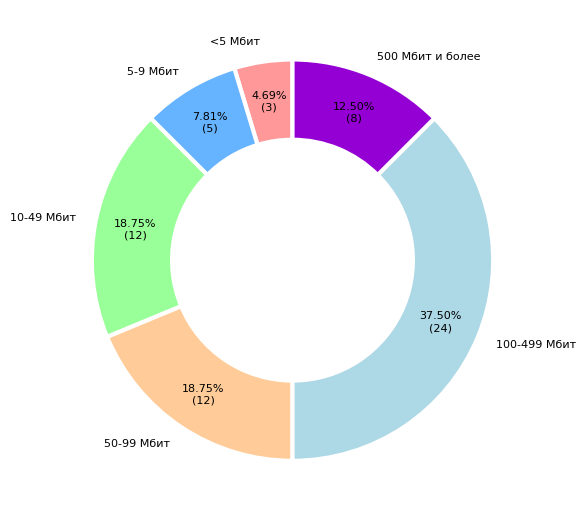

<Figure size 640x480 with 0 Axes>

In [ ]:
v1 = make_pie(odf2[0])
plt.savefig('/content/drive/MyDrive/static/internet_speed.png', dpi=200, pad_inches=0)
plt.show()

In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf2[1].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf2[1].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_internet_1 = "<h2>"+ndf2[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('internet_nut_2.html', 'w')
fd.write(html_internet_1)
fd.close()
display(HTML(html_internet_1))

['До 10%' 3.0 0.125]
['11% - 25%' 13.0 0.5416666666666666]
['26% - 50%' 7.0 0.2916666666666667]
['76% - 100%' 1.0 0.041666666666666664]


,1,2
До 10%,3.0,0.125
11% - 25%,13.0,0.5416666666666666
26% - 50%,7.0,0.2916666666666667
76% - 100%,1.0,0.041666666666666664


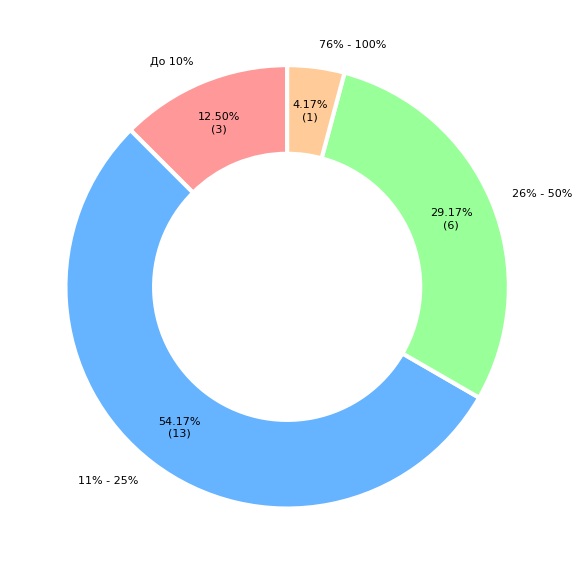

<Figure size 640x480 with 0 Axes>

In [ ]:
v2 = make_pie(odf2[1])
plt.savefig('/content/drive/MyDrive/static/internet_speed_1.png', dpi=200, pad_inches=0)
plt.show()

In [ ]:
from IPython.display import display, HTML, IFrame


headers = '<tr bgcolor="#ddd">'
c = 0
for val in np.array(odf2[2].columns):
  if c == 0:
    val = '&nbsp'
  c += 1
  headers += "<th>"+str(val)+"</th>\n"
headers += "</tr>"

# Выведем по очереди все строки и столбцы в них
table = ''
for index, row in odf2[2].iterrows():

  table += "<tr>"
  arow = np.array(row)
  print(arow)
  for i, col in enumerate(arow):
    table += "<td>"+str(arow[i])+"</td>"
  table += "</tr>"


html_internet_2 = "<h2>"+ndf2[2]+"</h2><table class='table'>"+headers+table+"</table>"

fd = open('internet_nut_3.html', 'w')
fd.write(html_internet_2)
fd.close()
display(HTML(html_internet_2))

['Нет такой потребности' 46.0 0.6764705882352942]
['Да, есть; не более 250 мс' 8.0 0.11764705882352941]
['Да, есть; не более 100 мс' 6.0 0.08823529411764706]
['Да, есть; не более 80 мс' 4.0 0.058823529411764705]
['Да, есть; не более 50 мс' 4.0 0.058823529411764705]


,1,2
Нет такой потребности,46.0,0.6764705882352942
"Да, есть; не более 250 мс",8.0,0.11764705882352941
"Да, есть; не более 100 мс",6.0,0.08823529411764706
"Да, есть; не более 80 мс",4.0,0.058823529411764705
"Да, есть; не более 50 мс",4.0,0.058823529411764705


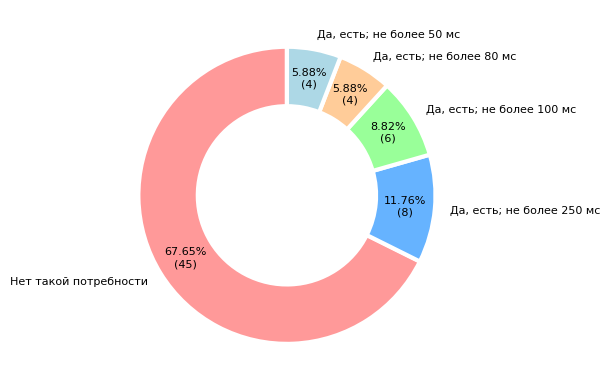

<Figure size 640x480 with 0 Axes>

In [ ]:
v3 = make_pie(odf2[2])
plt.savefig('/content/drive/MyDrive/static/internet_speed_2.png', dpi=200, pad_inches=0)
plt.show()